In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime as date
pd.set_option('display.max_columns',None)

In [2]:
plt.style.use('ggplot')
pd.options.display.float_format ='{:,.3f}'.format

In [3]:
df = pd.read_csv(r"C:\Users\lanmo\Downloads\google_log.csv\google_log.csv",sep = '\t',low_memory = True)

C:\Users\lanmo\AppData\Local\Temp\ipykernel_18468\158890252.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\lanmo\Downloads\google_log.csv\google_log.csv",sep = '\t',low_memory = True)


In [4]:
df.head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,20160902,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,Turkey,Izmir,Izmir,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
1,20160902,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,Australia,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
2,20160902,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,Spain,Community of Madrid,Madrid,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
3,20160902,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,google + online,NaN,NaN,NaN,NaN,NaN
4,20160902,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN


__Описание колонок:__ 


- `date` дата посещения сайта (рассматривается период с 20160801 по 20170801
- `fullVisitorId` уникальный id пользователя
- `sessionId` уникальный id одной пользовательской сессии
- `channelGrouping` откуда произошёл переход
- `visitStartTime` timestamp начала визита
- `device.browser` браузер визита
- `device.operatingSystem` операционная система устройства
- `device.isMobile` является ли устройство мобильным
- `device.deviceCategory` тип устройства (айпад, компьютер, мобильный телефон)
- `geoNetwork.subContinent` часть света пользователя
- `geoNetwork.country` страна пользователя
- `geoNetwork.region` регион пользователя
- `geoNetwork.city` город пользователя
- `totals.hits` похоже что это действия на сайте, но это неточно
- `totals.pageviews` просмотры страниц
- `totals.transactionRevenue` выручка с покупки
- `trafficSource.source` источник трафика
- `trafficSource.medium` более высокоуровневый источник трафика
- `trafficSource.keyword` ключевые слова из поиска
- `trafficSource.adwordsClickInfo.adNetworkType` несколько переменных с дополнительной информацией из adwords
- `trafficSource.adwordsClickInfo.page`
- `trafficSource.adwordsClickInfo.slot`
- `trafficSource.adwordsClickInfo.isVideoAd` 
- `trafficSource.adContent`

# Взглянем на основные показатели датасета

Размеры

In [5]:
df.shape

(903653, 24)

Типы данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 24 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   date                                          903653 non-null  int64  
 1   fullVisitorId                                 903653 non-null  object 
 2   sessionId                                     903653 non-null  object 
 3   channelGrouping                               903653 non-null  object 
 4   visitStartTime                                903653 non-null  int64  
 5   device.browser                                903653 non-null  object 
 6   device.operatingSystem                        903653 non-null  object 
 7   device.isMobile                               903653 non-null  bool   
 8   device.deviceCategory                         903653 non-null  object 
 9   geoNetwork.subContinent                       90

Доли пропущенных значений

In [7]:
(df
.isna()
.sum()
/len(df))

date                                           0.000
fullVisitorId                                  0.000
sessionId                                      0.000
channelGrouping                                0.000
visitStartTime                                 0.000
device.browser                                 0.000
device.operatingSystem                         0.000
device.isMobile                                0.000
device.deviceCategory                          0.000
geoNetwork.subContinent                        0.000
geoNetwork.country                             0.000
geoNetwork.region                              0.000
geoNetwork.city                                0.000
totals.hits                                    0.000
totals.pageviews                               0.000
totals.transactionRevenue                      0.987
trafficSource.source                           0.000
trafficSource.medium                           0.000
trafficSource.keyword                         

Только 1% процент от всех наблюдений совершил покупку.....

Взглянем на основные описательные статистики

In [8]:
df.describe()

,date,visitStartTime,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adwordsClickInfo.page
count,"903,653.000","903,653.000","903,653.000","903,553.000","11,515.000","21,460.000"
mean,"20,165,885.255","1,485,007,290.060",4.597,3.850,"133,744,788.537",1.008
std,"4,697.698","9,022,123.679",9.641,7.025,"448,285,227.300",0.174
min,"20,160,801.000","1,470,034,812.000",1.000,1.000,"10,000.000",1.000
25%,"20,161,027.000","1,477,561,169.000",1.000,1.000,"24,930,000.000",1.000
50%,"20,170,109.000","1,483,948,934.000",2.000,1.000,"49,450,000.000",1.000
75%,"20,170,421.000","1,492,758,762.000",4.000,4.000,"107,655,000.000",1.000
max,"20,170,801.000","1,501,657,193.000",500.000,469.000,"23,129,500,000.000",14.000


In [9]:
df.describe(include = 'object')

,fullVisitorId,sessionId,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
count,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,400724,21460,21460,21460,10946
unique,731421,902755,8,54,20,3,23,222,376,649,380,7,3659,2,2,1,44
top,1957458976293878100,14108533830165900_1482391162,Organic Search,Chrome,Windows,desktop,Northern America,United States,not available in demo dataset,not available in demo dataset,google,organic,(not provided),Google Search,Top,False,Google Merchandise Collection
freq,252,2,381561,620364,350072,664479,390657,364744,508229,508229,400788,381561,366363,21453,20956,21460,5122


In [10]:
df['totals.transactionRevenue'].count()

11515

# Поработаем со временем

In [11]:
df['date'] = pd.to_datetime(df['date'],format = '%Y%m%d')
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'],unit = 's')

In [12]:
df[['date','visitStartTime']]

,date,visitStartTime
0,2016-09-02,2016-09-02 15:33:05
1,2016-09-02,2016-09-03 05:22:27
2,2016-09-02,2016-09-03 01:16:26
3,2016-09-02,2016-09-03 05:40:13
4,2016-09-02,2016-09-02 13:23:20
...,...,...
903648,2017-01-04,2017-01-04 18:32:30
903649,2017-01-04,2017-01-04 15:29:58
903650,2017-01-04,2017-01-04 10:40:34
903651,2017-01-04,2017-01-05 05:07:44


Заметим, что дата посещения сайта и дата сеанса(начала просмотра товаров) - разные. 
Причем дата сеанса больше или равна дате посещения.
Посмотрим на разницу между ними.

<Axes: >

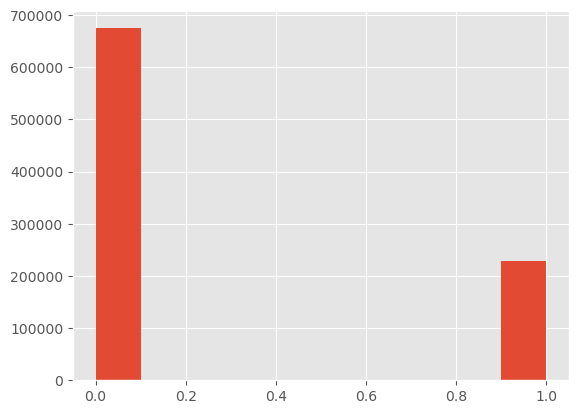

In [13]:
(df['visitStartTime'] - df['date']).dt.days.hist()

Как видно на графике, пользователи начинают сеанс максимум через день после посещения сайта.

In [14]:
df['month'] = df['date'].apply(lambda w: w.strftime('%Y-%m'))
df['weekday'] = df['date'].dt.weekday
df['days'] = df['date'].dt.day
df['hour'] = df['visitStartTime'].dt.hour

In [15]:
df.head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,month,weekday,days,hour
0,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Organic Search,2016-09-02 15:33:05,Chrome,Windows,False,desktop,Western Asia,Turkey,Izmir,Izmir,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,2016-09,4,2,15
1,2016-09-02,377306020877927890,377306020877927890_1472880147,Organic Search,2016-09-03 05:22:27,Firefox,Macintosh,False,desktop,Australasia,Australia,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,2016-09,4,2,5
2,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Organic Search,2016-09-03 01:16:26,Chrome,Windows,False,desktop,Southern Europe,Spain,Community of Madrid,Madrid,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,2016-09,4,2,1
3,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Organic Search,2016-09-03 05:40:13,UC Browser,Linux,False,desktop,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,google + online,NaN,NaN,NaN,NaN,NaN,2016-09,4,2,5
4,2016-09-02,27294437909732085,27294437909732085_1472822600,Organic Search,2016-09-02 13:23:20,Chrome,Android,True,mobile,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,1,1.000,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,2016-09,4,2,13


# Как много людей посещает сайт?

Text(0, 0.5, 'Количество посещений')

<Figure size 1200x1200 with 0 Axes>

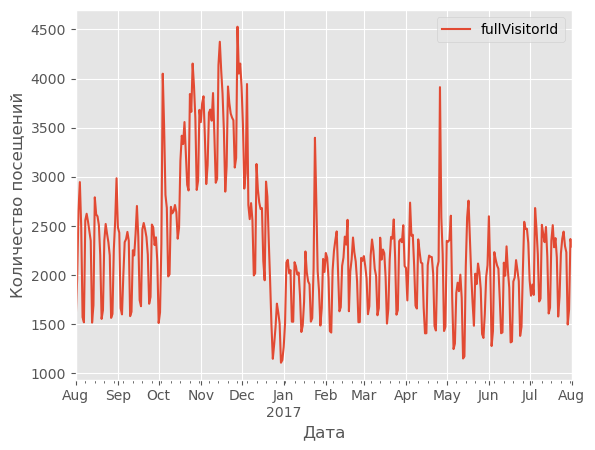

In [16]:
plt.figure(figsize = (12,12))
posech = df.groupby('date').agg({'fullVisitorId':'nunique'})
posech.plot()
plt.xlabel('Дата')
plt.ylabel('Количество посещений')

Больше всего посещений наблюдается в период между ноябрем и декабрем. Это свяазано с новогодними праздниками и подготовкой подарков к ним.

Также есть резкие скачки в наших данных. К примеру, между январем и февралем,апрелем и маем,октябрем и ноябрем. Скорее всего это связано с какими-то праздниками, которые празднуются во всем мире.

Text(0.5, 1.0, 'Посещение по месяцам')

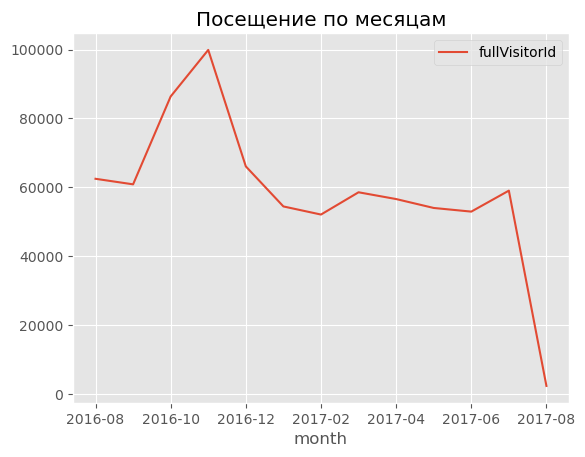

In [17]:
df.groupby('month').agg({'fullVisitorId':'nunique'}).plot()
plt.title('Посещение по месяцам')

Text(0.5, 1.0, 'Посещение по дням недели')

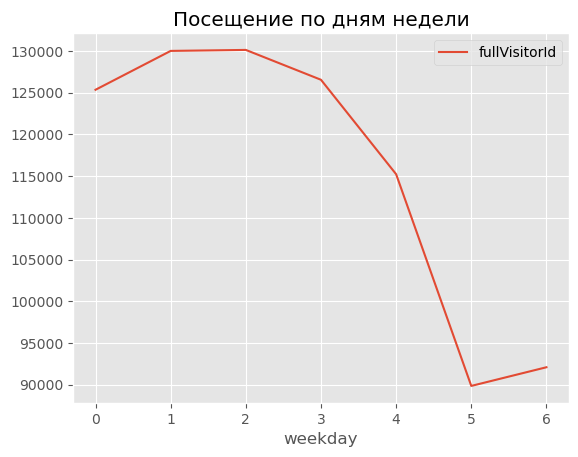

In [18]:
df.groupby('weekday').agg({'fullVisitorId':'nunique'}).plot()
plt.title('Посещение по дням недели')

Text(0.5, 1.0, 'Посещение по часам')

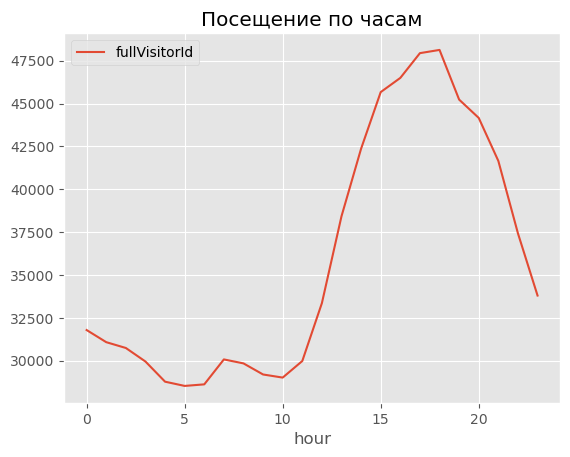

In [19]:
df.groupby('hour').agg({'fullVisitorId':'nunique'}).plot()
plt.title('Посещение по часам')

Отметим:
- Количество новых пользователей растет до начала декабря и резко падает после.
- Больше всего новых посещений приходится на будние дни
- Основное время когда приходят новые пользователи с 10 до 20 часов

# Откуда приходят новые пользователи?

Text(0, 0.5, 'Источники')

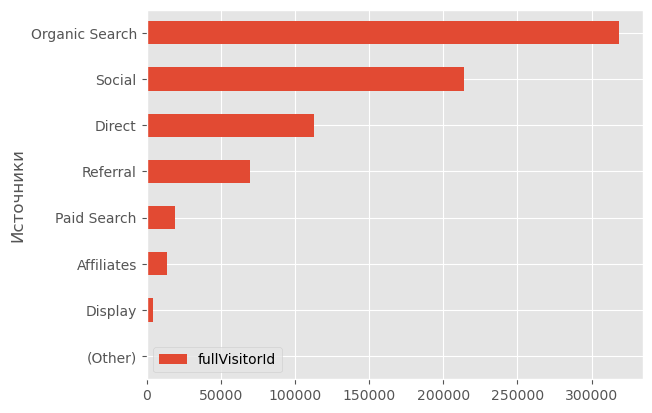

In [20]:
(pd.DataFrame(df
              .groupby('channelGrouping')['fullVisitorId']
              .nunique())
 .sort_values('fullVisitorId')
 .plot(kind='barh'))
plt.ylabel('Источники')

# Какие основные устройства?

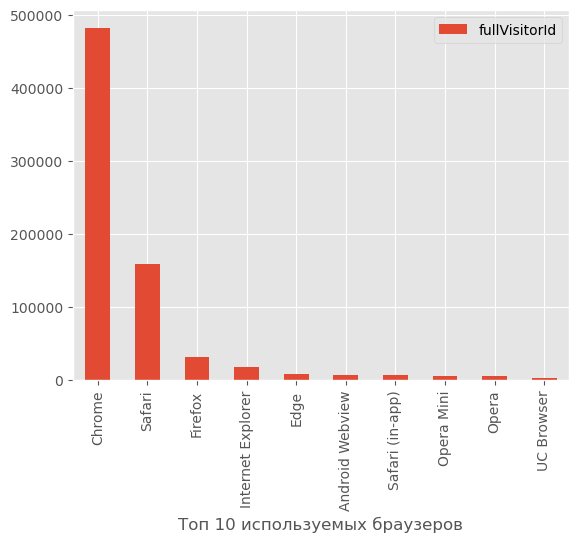

In [21]:
(pd.DataFrame(df
              .groupby('device.browser')['fullVisitorId']
              .nunique()
              )
 .sort_values('fullVisitorId',ascending =False)
 .head(10)
 .plot(kind='bar'))
plt.xlabel('Топ 10 используемых браузеров')
plt.show()

Text(0.5, 0, 'Количество людей с разных устройств')

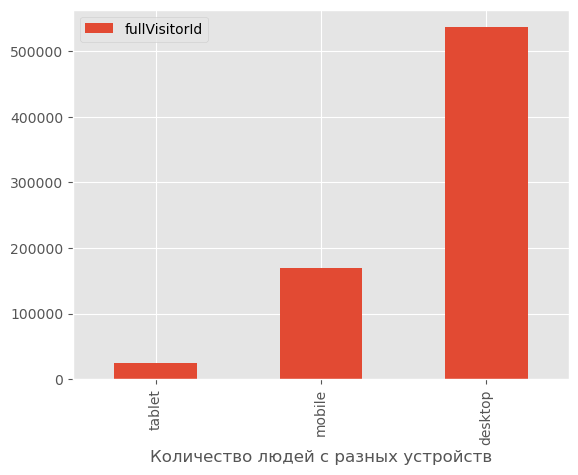

In [22]:
(pd.DataFrame(df
              .groupby('device.deviceCategory')['fullVisitorId']
              .nunique())
 .sort_values('fullVisitorId')
 .plot(kind='bar'))
plt.xlabel('Количество людей с разных устройств')

# Как часто возвращаются люди?

In [23]:
min_date=(df
 .groupby('fullVisitorId')
 .agg({'date':'min',
      'month':'min',
      'visitStartTime':'min'}))


In [24]:
min_date.columns = ['first_date','first_month','first_session']

In [25]:
min_date

,first_date,first_month,first_session
fullVisitorId,,,
4823595352351,2016-11-01,2016-11,2016-11-01 14:45:10
5103959234087,2016-08-21,2016-08,2016-08-21 22:06:48
10278554503158,2016-10-20,2016-10,2016-10-21 05:57:46
20424342248747,2016-11-30,2016-11,2016-12-01 07:55:01
26722803385797,2017-06-05,2017-06,2017-06-05 10:26:34
...,...,...,...
9999739624339618281,2017-02-10,2017-02,2017-02-10 18:54:34
9999761280717362235,2016-09-28,2016-09,2016-09-28 17:07:48
9999773079368714197,2017-06-11,2017-06,2017-06-11 19:43:43


In [26]:
vozvr = df.join(min_date,on = 'fullVisitorId')

In [27]:
req = vozvr.pivot_table(index = 'first_month',columns='month',values= 'fullVisitorId',aggfunc = 'nunique')

<Axes: xlabel='month', ylabel='first_month'>

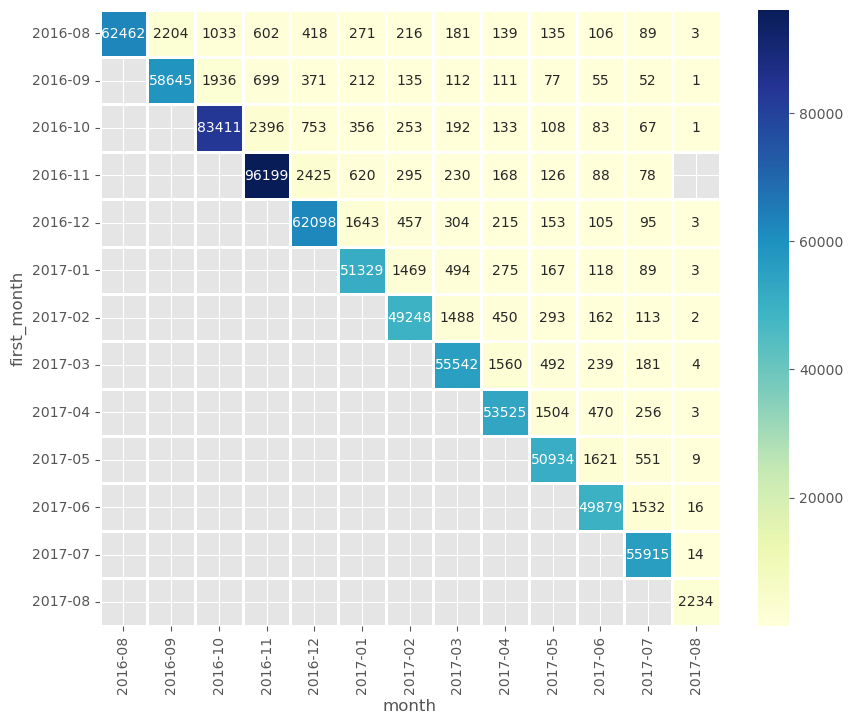

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(req,annot = True,fmt = '.0f',linewidths=1,cmap = 'YlGnBu')

Посмотрим в долях

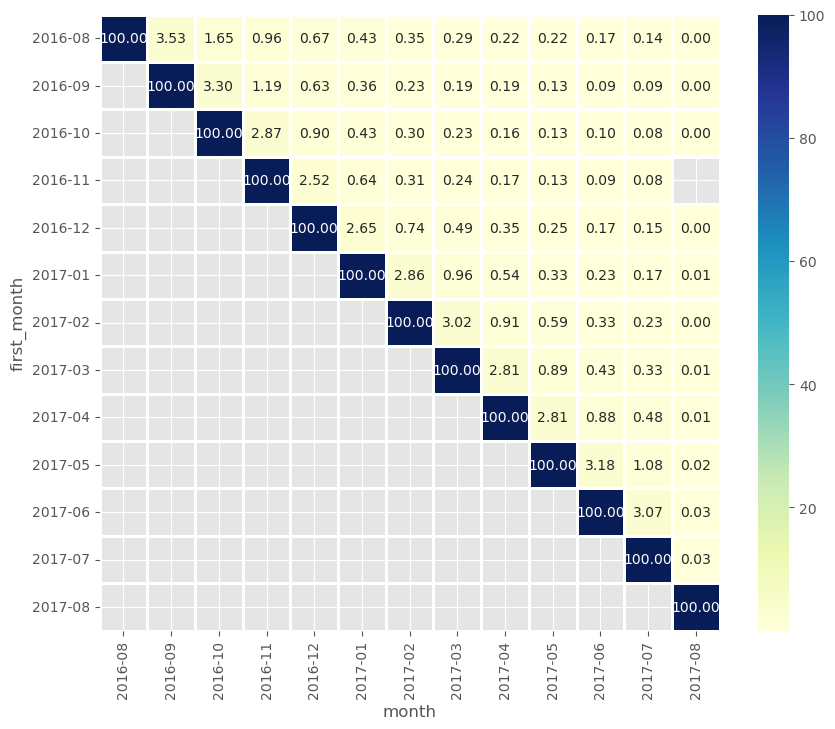

In [29]:
first_date = req.values.diagonal()

for s,row in zip(first_date, req):
    req.loc[row] = 100*(req.loc[row]/s)

plt.figure(figsize=(10, 8))
sns.heatmap(
    req,
    annot=True,
    fmt='.2f',
    linewidths=1, 
    cmap="YlGnBu"
);

На второй месяц возвращается только 3% людей,а затем все уходит в 0.

# Посмотрим на месячную выручку

In [30]:
montg = (df
.groupby('month')
.agg({'totals.transactionRevenue':'count'}))

In [31]:
montg

,totals.transactionRevenue
month,
2016-08,1119
2016-09,859
2016-10,872
2016-11,919
2016-12,1395
2017-01,697
2017-02,708
2017-03,883
2017-04,928


C:\Users\lanmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lanmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


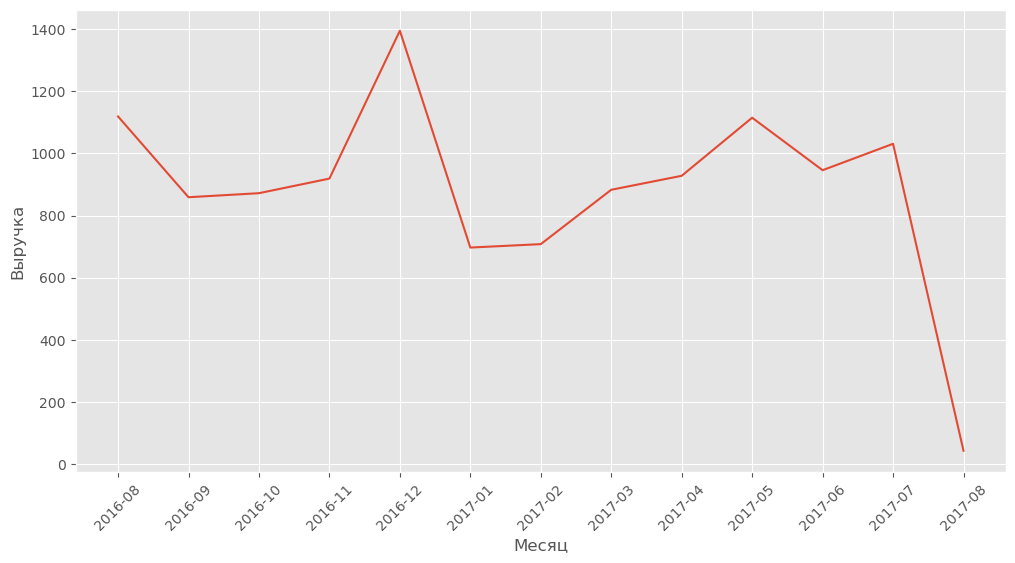

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data = montg, x = 'month', y = 'totals.transactionRevenue',)
plt.xticks(rotation = 45)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

     Количество покупок зависит также, как и частота посещений по месяцам

# Как сильно отличаются даты первых покупок и посещений?

In [33]:
trans = vozvr.dropna(subset = ['totals.transactionRevenue'])

In [34]:
first_by = trans.groupby('fullVisitorId').agg(
{'date':'min',
'visitStartTime':'min',
'month':'min'})
first_by

,date,visitStartTime,month
fullVisitorId,,,
213131142648941,2017-04-28,2017-04-28 22:41:58,2017-04
435324061339869,2016-10-20,2016-10-21 01:33:41,2016-10
562678147042735,2017-04-24,2017-04-24 14:27:36,2017-04
585708896049892,2016-12-21,2016-12-21 20:59:44,2016-12
670722016498267,2017-07-10,2017-07-10 18:00:43,2017-07
...,...,...,...
9963340111077611257,2016-08-14,2016-08-14 20:47:11,2016-08
9972043774359472649,2016-08-31,2016-08-31 07:14:49,2016-08
9974232250427988367,2017-01-06,2017-01-06 18:04:23,2017-01


In [35]:
first_by.columns = ['first_date_buy','first_session_buy','first_month_buy']

In [36]:
trans = trans.join(first_by,on = 'fullVisitorId')

In [37]:
trans

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,month,weekday,days,hour,first_date,first_month,first_session,first_date_buy,first_session_buy,first_month_buy
752,2016-09-02,6194193421514403509,6194193421514403509_1472843572,Direct,2016-09-02 19:12:52,Chrome,Linux,False,desktop,Northern America,United States,Michigan,Ann Arbor,11,11.000,"37,860,000.000",(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,2016-09,4,2,19,2016-09-02,2016-09,2016-09-02 19:12:52,2016-09-02,2016-09-02 19:12:52,2016-09
753,2016-09-02,5327166854580374902,5327166854580374902_1472844906,Organic Search,2016-09-02 19:35:06,Chrome,Macintosh,False,desktop,Northern America,United States,New York,New York,11,10.000,"306,670,000.000",google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,2016-09,4,2,19,2016-09-02,2016-09,2016-09-02 19:35:06,2016-09-02,2016-09-02 19:35:06,2016-09
799,2016-09-02,8885051388942907862,8885051388942907862_1472827393,Referral,2016-09-02 14:43:13,Chrome,Linux,False,desktop,Northern America,United States,New York,New York,13,11.000,"68,030,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2016-09,4,2,14,2016-08-06,2016-08,2016-08-06 18:42:52,2016-08-12,2016-08-12 23:02:40,2016-08
802,2016-09-02,185467632009737931,0185467632009737931_1472846398,Referral,2016-09-02 19:59:58,Chrome,Windows,False,desktop,Northern America,United States,California,Mountain View,13,12.000,"26,250,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2016-09,4,2,19,2016-08-30,2016-08,2016-08-30 19:14:03,2016-09-02,2016-09-02 19:59:58,2016-09
859,2016-09-02,3244885836845029978,3244885836845029978_1472824817,Referral,2016-09-02 14:00:17,Chrome,Macintosh,False,desktop,Northern America,United States,not available in demo dataset,not available in demo dataset,17,14.000,"574,150,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2016-09,4,2,14,2016-08-19,2016-08,2016-08-19 19:36:37,2016-08-22,2016-08-22 18:50:23,2016-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903302,2017-01-04,6849604863010168468,6849604863010168468_1483566314,Referral,2017-01-04 21:45:14,Chrome,Macintosh,False,desktop,Northern America,United States,New York,New York,61,48.000,"335,260,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2017-01,2,4,21,2016-10-03,2016-10,2016-10-03 18:33:14,2016-10-03,2016-10-03 18:33:14,2016-10
903305,2017-01-04,211986650009953276,0211986650009953276_1483568879,Referral,2017-01-04 22:27:59,Chrome,Macintosh,False,desktop,Northern America,United States,Texas,Austin,66,30.000,"599,950,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2017-01,2,4,22,2017-01-04,2017-01,2017-01-04 22:27:59,2017-01-04,2017-01-04 22:27:59,2017-01
903314,2017-01-04,9981562221973608723,9981562221973608723_1483576938,Referral,2017-01-05 00:42:18,Chrome,Macintosh,False,desktop,Eastern Asia,South Korea,Seoul,Seoul,122,90.000,"30,750,000.000",mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN,NaN,2017-01,2,4,0,2017-01-04,2017-01,2017-01-05 00:42:18,2017-01-04,2017-01-05 00:42:18,2017-01
903315,2017-01-04,963126344221316701,963126344221316701_1483552674,Direct,2017-01-04 17:57:54,Firefox,Macintosh,False,desktop,Northern America,United States,New York,New York,130,90.000,"69,390,000.000",(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,2017-01,2,4,17,2017-01-03,2017-01,2017-01-04 01:30:37,2017-01-04,2017-01-04 17:57:54,2017-01


<Axes: >

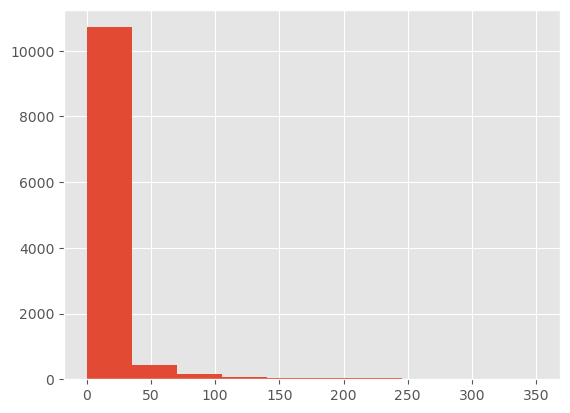

In [38]:
pokypki = (trans['first_session_buy'] - trans['first_session']).dt.days
pokypki.hist()

In [39]:
pokypki.quantile(0.69)

0.0

In [40]:
pokypki.quantile(0.7)

1.0

69% от всех покупок были совершены в первый сеанс

In [41]:
pokypki.sort_values(ascending=False).head(30)

773534    351
224418    347
836546    341
712590    334
64048     325
172347    321
80555     315
532562    307
41081     304
172511    303
80506     298
451104    292
760459    280
786305    275
532653    275
73909     274
663224    270
264964    260
899936    251
452110    249
241397    246
679536    244
799539    244
375228    243
780012    242
80529     240
715099    240
787341    239
680079    238
375116    234
dtype: int64

Самый большой промежуток времени между первой датой сеанса и покупки - 351 день.

# Как распределеяется выручка по дням недели и часам?

Text(0.5, 102.72222222222219, 'Дни недели')

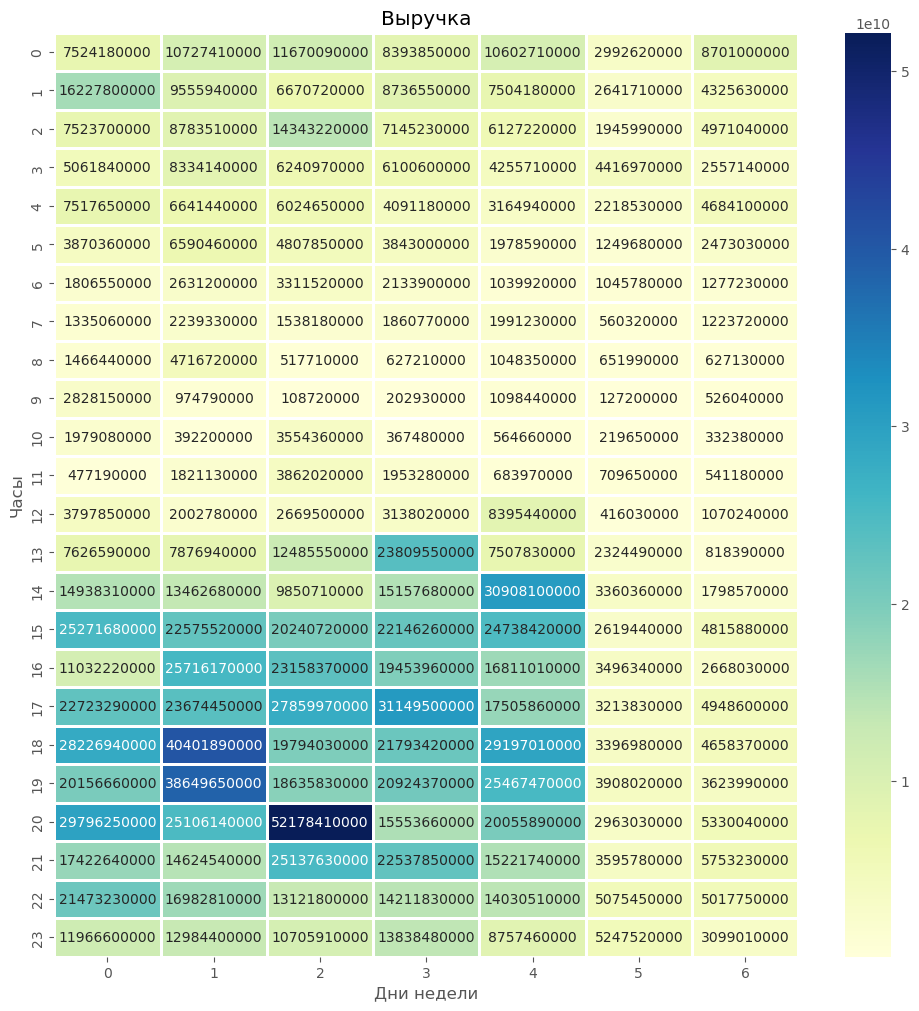

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(trans.pivot_table(values = 'totals.transactionRevenue',index = 'hour', columns='weekday',aggfunc='sum'),annot=True,
    fmt='.0f',
    linewidths=1, 
    cmap="YlGnBu")
plt.title('Выручка')
plt.ylabel('Часы')
plt.xlabel('Дни недели')

C 15 по 20 по будням самая большая выручка

Text(0.5, 102.72222222222219, 'Дни недели')

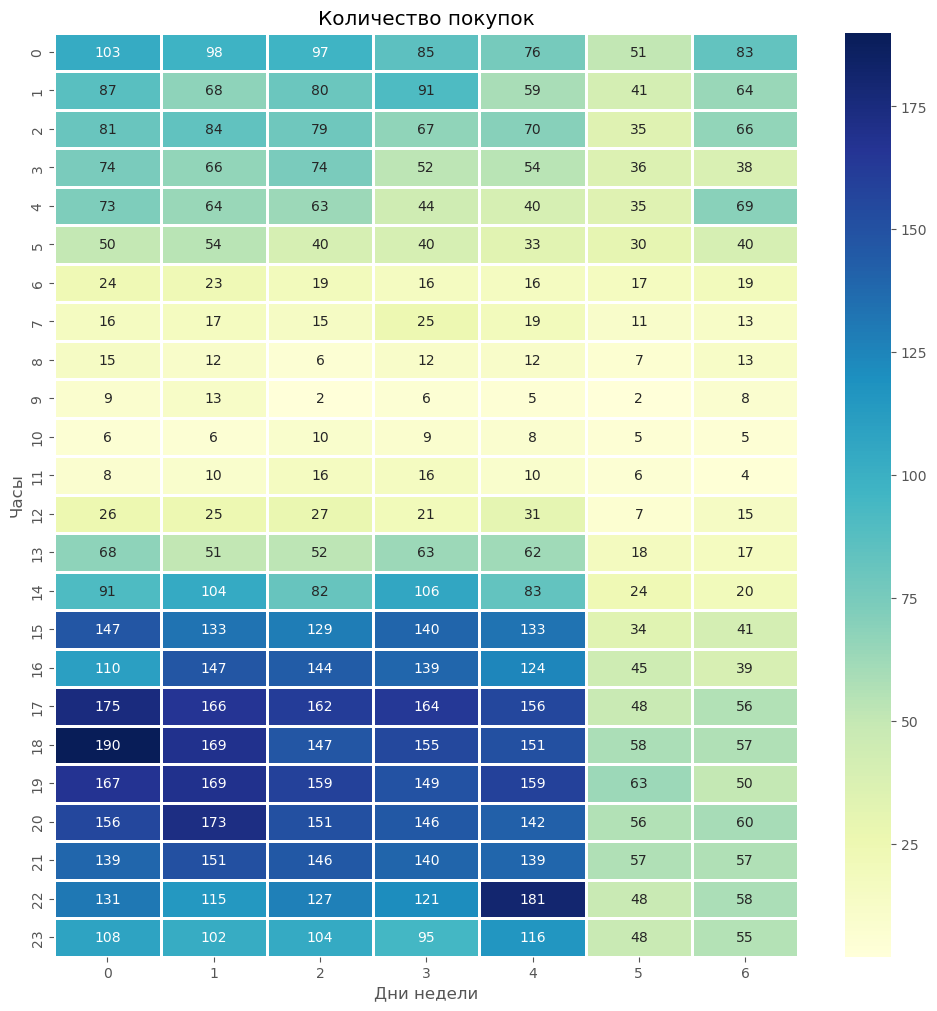

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(trans.pivot_table(values = 'totals.transactionRevenue',index = 'hour', columns='weekday',aggfunc='count'),annot=True,
    fmt='.0f',
    linewidths=1, 
    cmap="YlGnBu")
plt.title('Количество покупок')
plt.ylabel('Часы')
plt.xlabel('Дни недели')

# Источник трафика и влияние на выручку

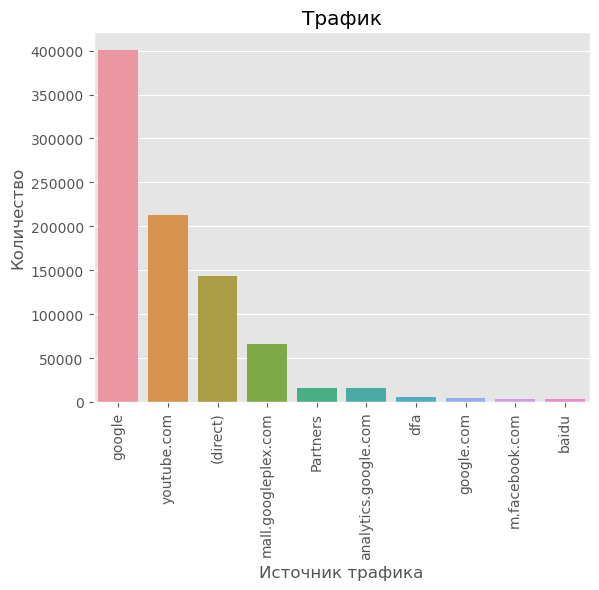

In [44]:
sns.barplot(pd.DataFrame(df['trafficSource.source'].value_counts()).reset_index().head(10),x = 'trafficSource.source',y='count')
plt.xticks(rotation = 90)
plt.title('Трафик')
plt.ylabel('Количество')
plt.xlabel('Источник трафика')
plt.show()

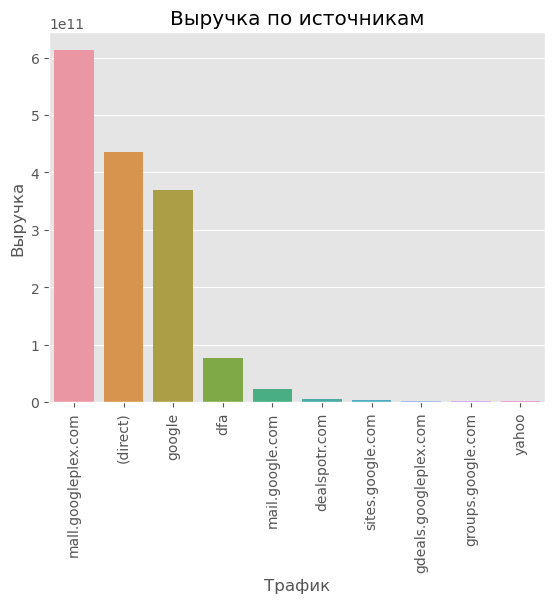

In [45]:
sns.barplot((pd.DataFrame(trans
.groupby('trafficSource.source')
.agg({'totals.transactionRevenue':'sum'}))
.sort_values('totals.transactionRevenue',ascending = False)
.head(10)
.reset_index()),x = 'trafficSource.source', y= 'totals.transactionRevenue')
plt.xticks(rotation = 90)
plt.title('Выручка по источникам')
plt.xlabel('Трафик')
plt.ylabel('Выручка')
plt.show()

Отметим, что больше всего трафика приходит от гугла,ютуба,директа и почты гугла, но ютуб не приносит никакой выручки.

# Выручка в разбивке по странам и городам

In [46]:
trans_count = (
trans.groupby('geoNetwork.country')
.agg({'totals.transactionRevenue':'sum'}
).sort_values('totals.transactionRevenue',ascending=False))

In [47]:
trans_count['totals.transactionRevenue']/trans_count['totals.transactionRevenue'].sum()

geoNetwork.country
United States   0.943
Canada          0.021
Venezuela       0.009
Japan           0.004
Kenya           0.003
                 ... 
Armenia         0.000
Guadeloupe      0.000
Denmark         0.000
Anguilla        0.000
Uruguay         0.000
Name: totals.transactionRevenue, Length: 69, dtype: float64

Основные покупатели из США. Взглянем на распределение по городам.

In [48]:
trans_gorod = (
trans.groupby('geoNetwork.city')
.agg({'totals.transactionRevenue':'sum'}
).sort_values('totals.transactionRevenue',ascending=False)
.reset_index())

In [49]:
trans_gorod.head(10)

,geoNetwork.city,totals.transactionRevenue
0,not available in demo dataset,"646,161,110,000.000"
1,New York,"220,143,510,000.000"
2,Mountain View,"126,103,680,000.000"
3,San Francisco,"100,873,960,000.000"
4,Chicago,"72,854,530,000.000"
5,Los Angeles,"41,896,330,000.000"
6,Sunnyvale,"39,393,580,000.000"
7,Seattle,"26,991,170,000.000"
8,Ann Arbor,"26,677,470,000.000"
9,Salem,"22,115,920,000.000"


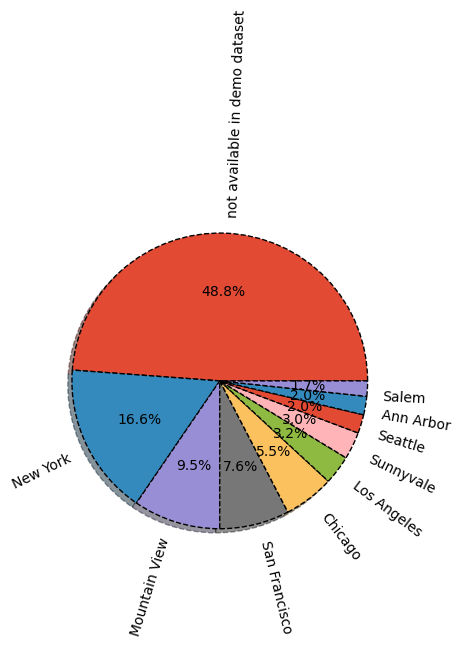

In [50]:
plt.pie(trans_gorod['totals.transactionRevenue'].head(10),labels  = trans_gorod['geoNetwork.city'].head(10),autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
plt.show()

Упс.... В этих данных есть города, про которые нам нельзя знать(.
Рассмотрим города, исключив данное наблюдени.

In [51]:
trans_gorod.drop(0,axis = 0,inplace = True)

In [52]:
trans_gorod['dol'] = trans_gorod['totals.transactionRevenue']/trans_gorod['totals.transactionRevenue'].sum()

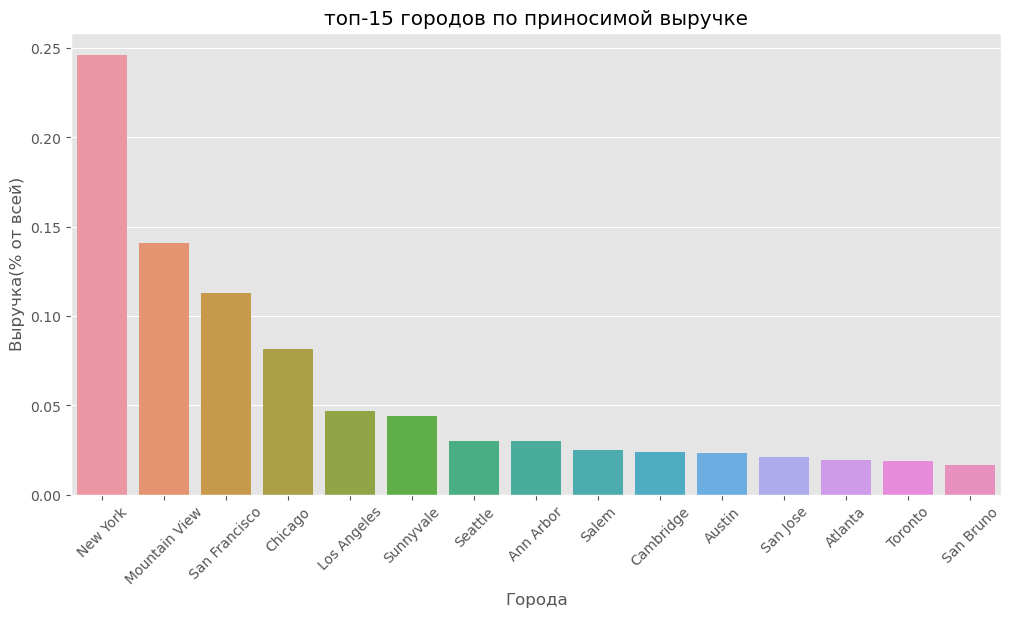

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(trans_gorod.head(15),x = 'geoNetwork.city', y ='dol')
plt.xticks(rotation = 45)
plt.title('топ-15 городов по приносимой выручке')
plt.ylabel('Выручка(% от всей)')
plt.xlabel('Города')
plt.show()

# Итог

Изучив данные логов гугла, мы можем заметить несколько моментов, которые могут помочь улучшить продукт или сократить издержики.

1) В октябре наблюдается тенденция увеличения числа новых покупателей, которая быстро растет до декабря, а затем также быстро идет на спад. Эта тенденция носит сезонный характер и, вероятно, будет повторяться в следующие годы. Поэтому в этот период новым покупателям можно предлагать скидки или другие выгодные условия для увеличения выручки.

2) Большинство покупок совершается в будние дни в период с 10 до 20 часов. Вероятно, основными покупателями являются офисные служащие, которые осуществляют покупки во время рабочего времени, как для личных нужд, так и для своей профессиональной деятельности.

3) Очень мало людей возвращается на сайт после первого посещения, что негативно сказывается на выручке. Это можно попытаться исправить, предложив различные акции для покупателей или улучшив интерфейс, сделав его более удобным и привлекательным.

4) Также 70% покупок совершается в первый и единственный заход. Можно попытаться исправить это положение, применяя методы, указанные в пункте 3, либо сделать акцент на постоянных клиентах и подробнее изучить их предпочтения.

5) Многие пользователи переходят на сайт с YouTube, однако конверсия в покупки среди этих посетителей очень низкая. В связи с этим целесообразно пересмотреть стратегию рекламных расходов на данной платформе. Возможно, стоит сократить бюджет на рекламу или даже полностью отказаться от неё, если текущие затраты не оправдывают себя

6) Основными покупателями являются граждане США из крупных городов, таких как Нью-Йорк и Сан-Франциско. Следует подробнее изучить особенности каждого города и покупки, которые совершают жители этих городов, чтобы лучше понять их предпочтения и повысить эффективность маркетинговых стратегий.